In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "inventory_data.csv"  # Ensure this file is in the same directory as the notebook
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,inventory_id,dealer_id,product_id,stock_level,reorder_threshold,last_restock_date,last_sold_date,location,daily_consumption_rate,avg_monthly_demand,supplier_lead_time,order_quantity,days_since_restock,days_since_last_sold,safety_stock_level,historical_sales,stock_reorder_flag,stock_value
0,1,202,5036,492,64,2024-12-05 06:08:32.792543,2025-02-19 06:08:32.866568,Warehouse B,4.33,129,25,138,79,3,162,4118,0,37810.00
1,2,448,9401,47,70,2025-01-24 06:08:32.792584,2025-01-08 06:08:32.866596,Warehouse A,3.47,104,23,153,29,45,119,2504,1,2618.21
2,3,370,4727,126,50,2025-01-27 06:08:32.792591,2025-01-19 06:08:32.866606,Distribution Hub,0.53,15,11,28,26,34,8,3048,0,9030.19
3,4,206,4928,168,45,2025-01-26 06:08:32.792598,2025-02-13 06:08:32.866615,Store X,4.35,130,26,85,27,9,169,1039,0,12575.06
4,5,171,3803,353,11,2024-12-17 06:08:32.792603,2024-12-31 06:08:32.866624,Warehouse A,0.59,17,19,142,67,53,16,2760,0,7737.26


## 1. Checking for Unique Values

In [3]:
df.nunique()

inventory_id              10000
dealer_id                   400
product_id                 6013
stock_level                 500
reorder_threshold            90
last_restock_date         10000
last_sold_date            10000
location                      5
daily_consumption_rate      451
avg_monthly_demand          136
supplier_lead_time           25
order_quantity              190
days_since_restock           89
days_since_last_sold         60
safety_stock_level          214
historical_sales           4277
stock_reorder_flag            2
stock_value                9964
dtype: int64

## 2. Summary Statistics

In [4]:
df.describe()

,inventory_id,dealer_id,product_id,stock_level,reorder_threshold,daily_consumption_rate,avg_monthly_demand,supplier_lead_time,order_quantity,days_since_restock,days_since_last_sold,safety_stock_level,historical_sales,stock_reorder_flag,stock_value
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000
mean,5000.50000,299.401800,5480.806000,249.235500,54.71920,2.756555,82.242400,16.843200,104.616200,44.710200,29.40550,68.963500,2583.051500,0.11650,13068.301102
std,2886.89568,115.557223,2602.777105,146.348188,26.01643,1.291616,38.746938,7.191063,55.035819,25.645362,17.26872,46.057222,1417.967135,0.32084,10994.356458
min,1.00000,100.000000,1000.000000,0.000000,10.00000,0.500000,15.000000,5.000000,10.000000,1.000000,0.00000,3.000000,100.000000,0.00000,0.000000
25%,2500.75000,200.000000,3217.000000,120.000000,32.00000,1.650000,49.000000,11.000000,57.000000,23.000000,15.00000,31.000000,1355.000000,0.00000,4006.837500
50%,5000.50000,298.000000,5507.000000,251.000000,54.00000,2.770000,83.000000,17.000000,106.000000,45.000000,29.00000,58.000000,2614.500000,0.00000,10008.710000
75%,7500.25000,400.000000,7707.250000,377.000000,77.00000,3.870000,116.000000,23.000000,153.000000,67.000000,44.00000,99.000000,3820.000000,0.00000,19705.600000
max,10000.00000,499.000000,9998.000000,499.000000,99.00000,5.000000,150.000000,29.000000,199.000000,89.000000,59.00000,216.000000,4999.000000,1.00000,49895.160000


## 3. Checking for Outliers

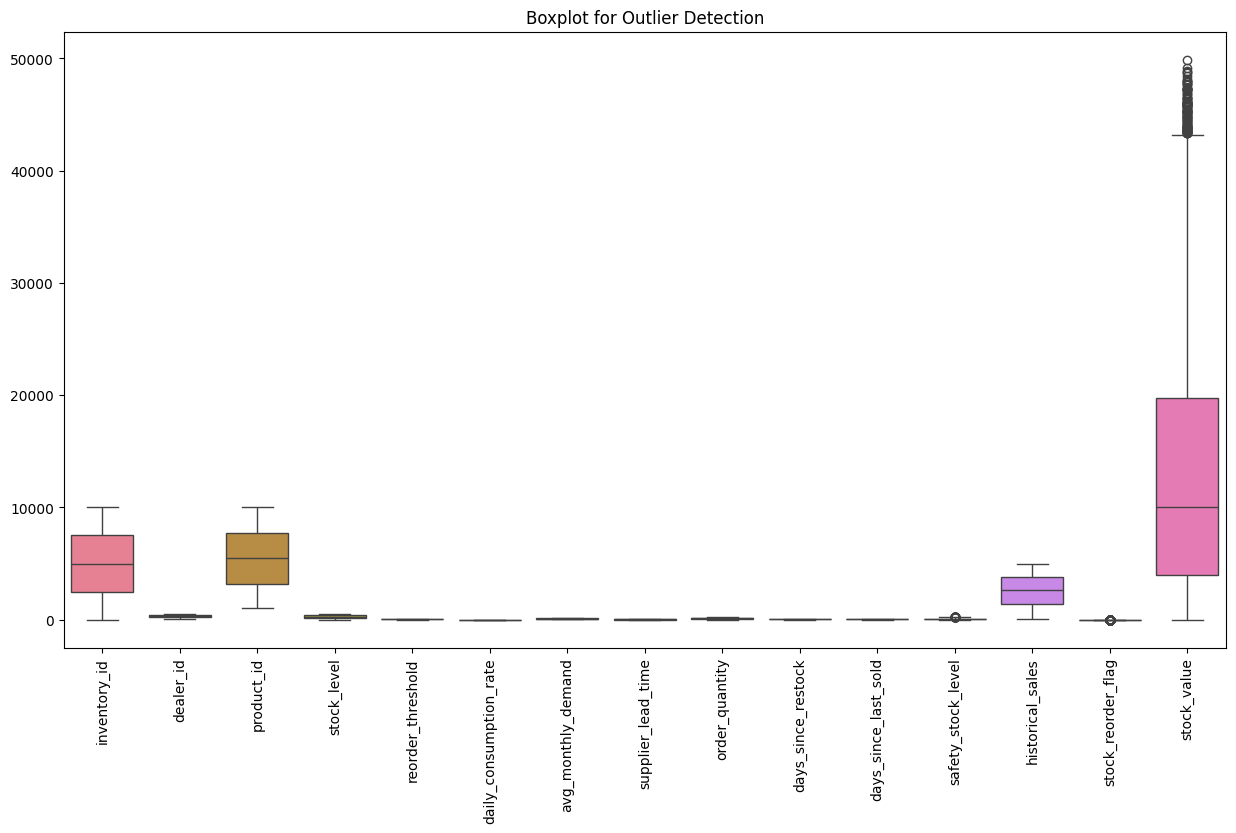

In [5]:

plt.figure(figsize=(15,8))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=90)
plt.title('Boxplot for Outlier Detection')
plt.show()


## 4. Presence of Outliers using IQR

In [6]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Compute IQR for numeric data
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).sum()
outliers


inventory_id                 0
dealer_id                    0
product_id                   0
stock_level                  0
reorder_threshold            0
daily_consumption_rate       0
avg_monthly_demand           0
supplier_lead_time           0
order_quantity               0
days_since_restock           0
days_since_last_sold         0
safety_stock_level          48
historical_sales             0
stock_reorder_flag        1165
stock_value                101
dtype: int64

## 5. Handling Outliers using IQR

In [7]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Compute IQR for numeric data
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers while keeping all columns
df_cleaned = df[~outliers]
df_cleaned.shape


(8690, 18)

## 6. Checking for Outlier Removal

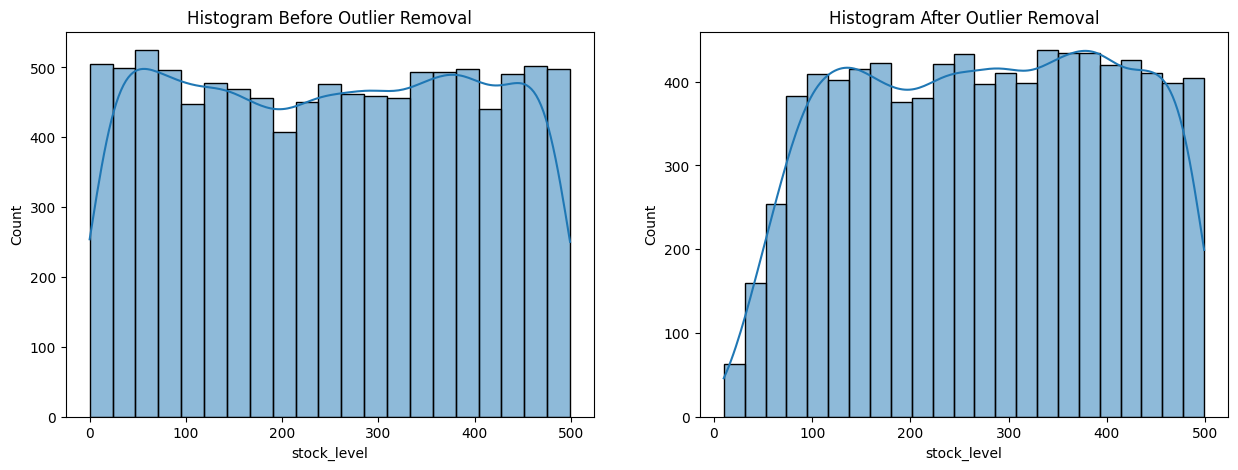

In [8]:

fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(df['stock_level'], ax=axes[0], kde=True)
axes[0].set_title("Histogram Before Outlier Removal")
sns.histplot(df_cleaned['stock_level'], ax=axes[1], kde=True)
axes[1].set_title("Histogram After Outlier Removal")
plt.show()


## 7. Adding Consumption Level Column and Ratios

In [9]:

df_cleaned['consumption_level'] = pd.cut(df_cleaned['daily_consumption_rate'], bins=3, labels=['Low', 'Medium', 'High'])
df_cleaned['quantity_ratio'] = df_cleaned['stock_level'] / df_cleaned['order_quantity']
df_cleaned[['daily_consumption_rate', 'consumption_level', 'quantity_ratio']].head()


C:\Users\CVR\AppData\Local\Temp\ipykernel_10872\2160424270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['consumption_level'] = pd.cut(df_cleaned['daily_consumption_rate'], bins=3, labels=['Low', 'Medium', 'High'])
C:\Users\CVR\AppData\Local\Temp\ipykernel_10872\2160424270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['quantity_ratio'] = df_cleaned['stock_level'] / df_cleaned['order_quantity']


,daily_consumption_rate,consumption_level,quantity_ratio
0,4.33,High,3.565217
2,0.53,Low,4.500000
3,4.35,High,1.976471
4,0.59,Low,2.485915
5,4.50,High,1.942708


## 8. Visualizing Quantity and Consumption Distribution

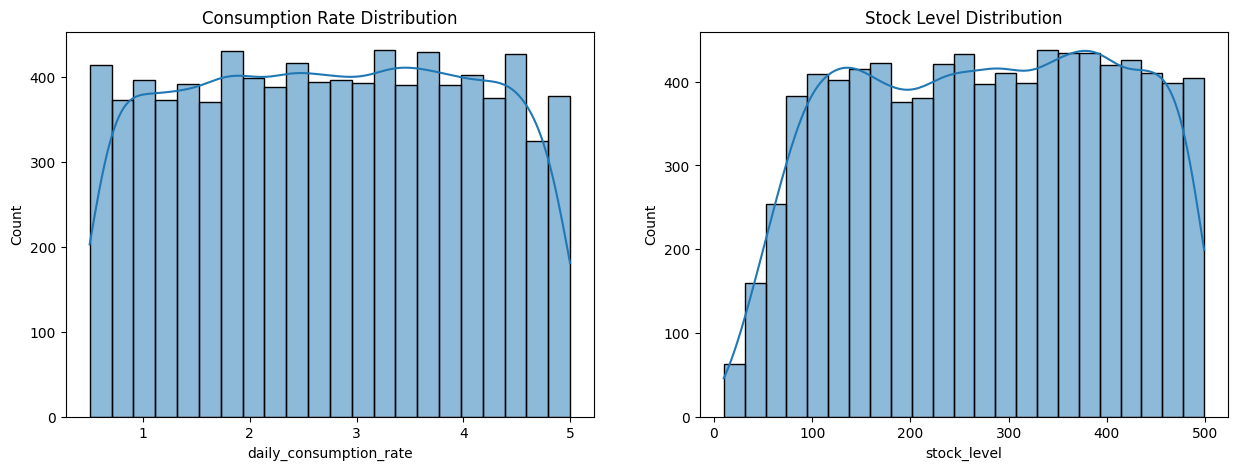

In [10]:

fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(df_cleaned['daily_consumption_rate'], ax=axes[0], kde=True)
axes[0].set_title("Consumption Rate Distribution")
sns.histplot(df_cleaned['stock_level'], ax=axes[1], kde=True)
axes[1].set_title("Stock Level Distribution")
plt.show()


## 9. Multivariate Analysis using Pie Chart

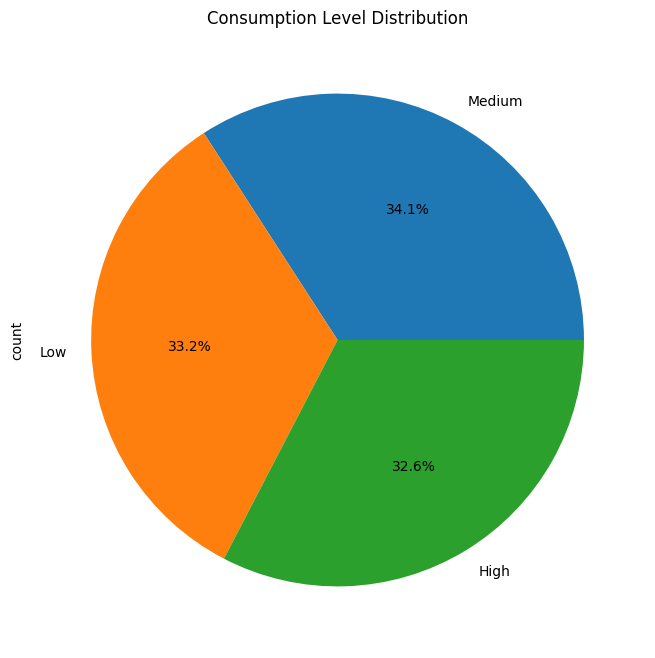

In [11]:

df_cleaned['consumption_level'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8,8))
plt.title("Consumption Level Distribution")
plt.show()


## 10. Univariate Analysis on Location

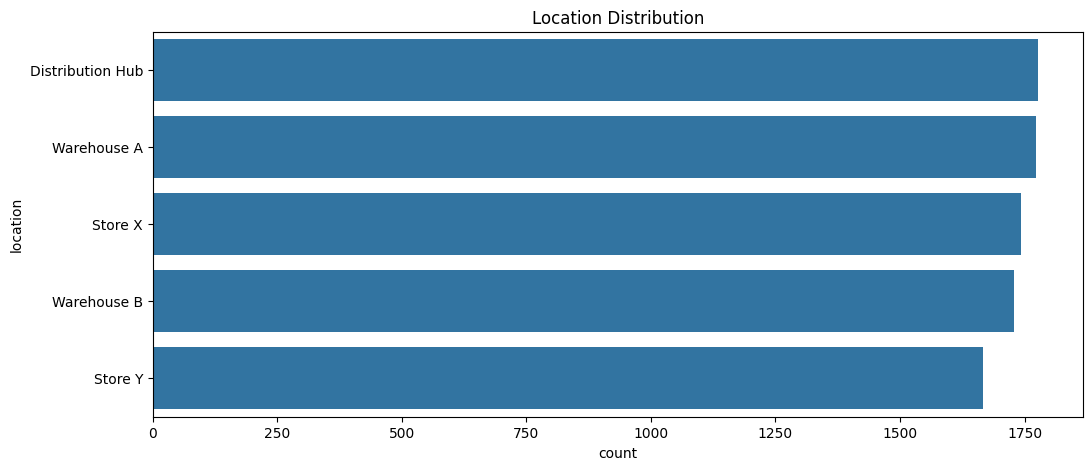

In [12]:

plt.figure(figsize=(12,5))
sns.countplot(y=df_cleaned['location'], order=df_cleaned['location'].value_counts().index)
plt.title("Location Distribution")
plt.show()


## 11. Feature-wise Visualization

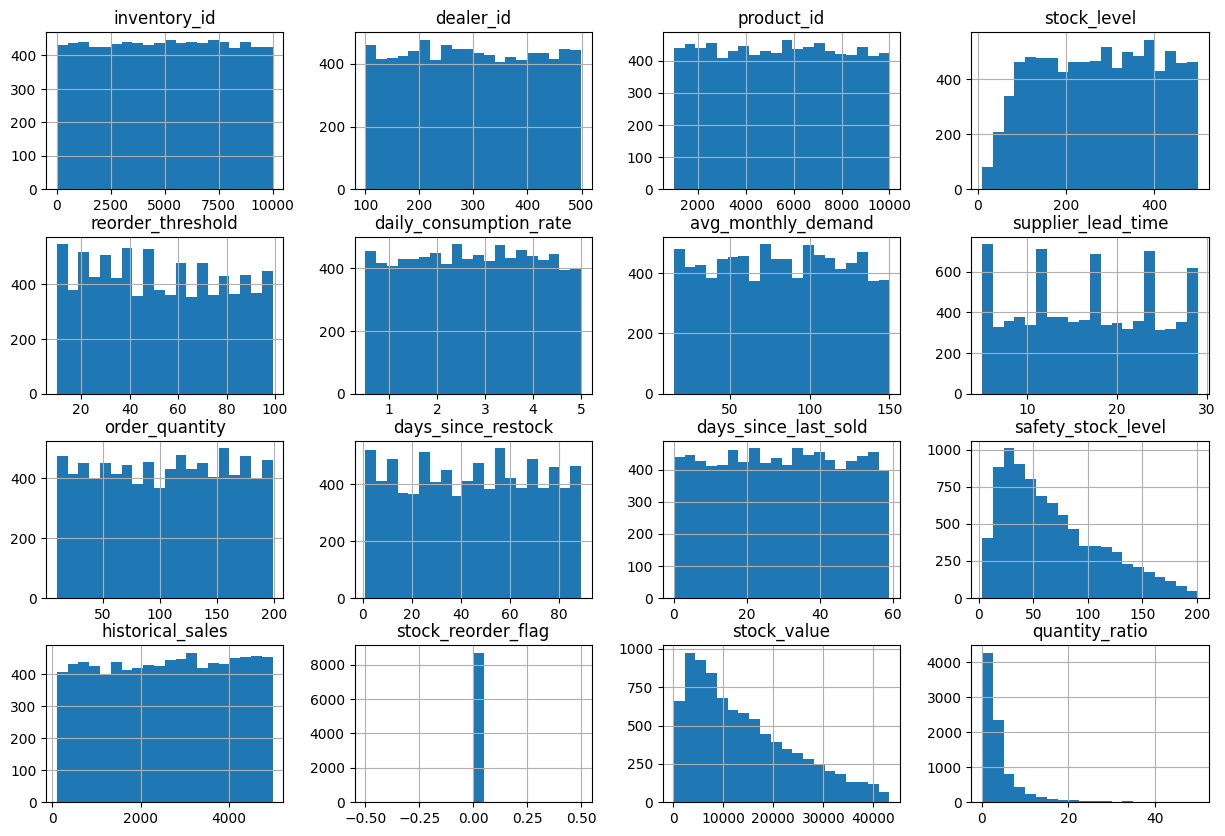

In [13]:

df_cleaned.hist(figsize=(15,10), bins=20)
plt.show()


## 12. Bivariate Analysis: Location Impact on Consumption

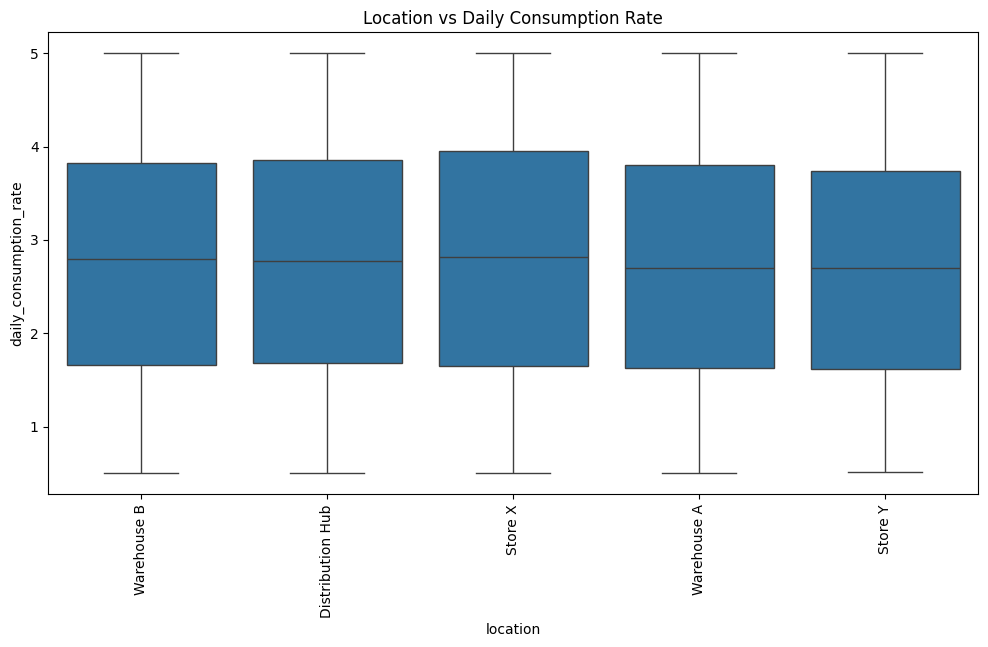

In [14]:

plt.figure(figsize=(12,6))
sns.boxplot(x='location', y='daily_consumption_rate', data=df_cleaned)
plt.xticks(rotation=90)
plt.title("Location vs Daily Consumption Rate")
plt.show()


## 13. Visualizing Dealer Columns

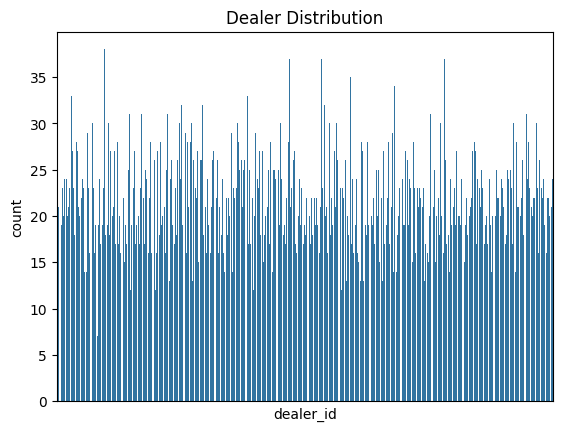

In [15]:

sns.countplot(x=df_cleaned['dealer_id'])
plt.xticks([]) # Too many unique dealers to label
plt.title("Dealer Distribution")
plt.show()


## 14. Bivariate Analysis: Dealer Impact on Consumption

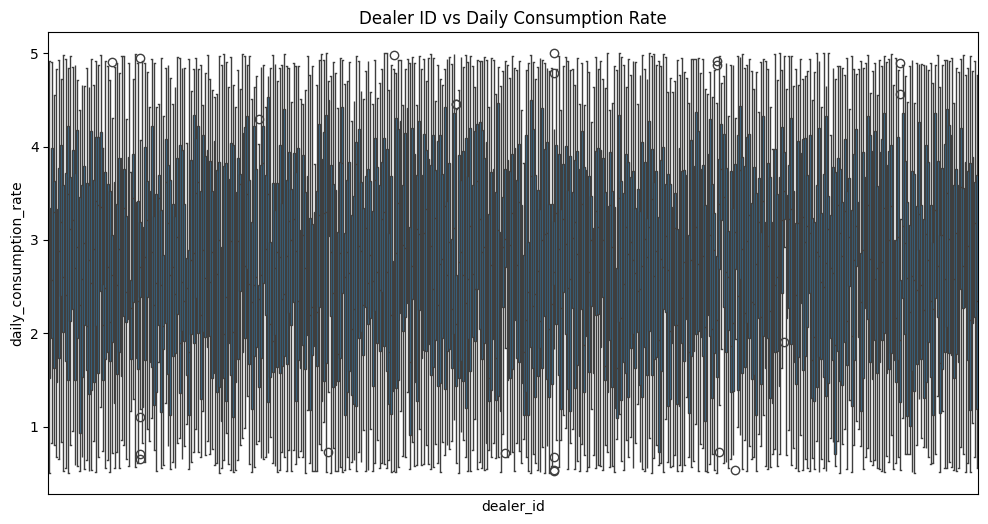

In [16]:

plt.figure(figsize=(12,6))
sns.boxplot(x='dealer_id', y='daily_consumption_rate', data=df_cleaned)
plt.xticks([]) # Too many unique dealers to label
plt.title("Dealer ID vs Daily Consumption Rate")
plt.show()


## 15. Most Used Product Analysis

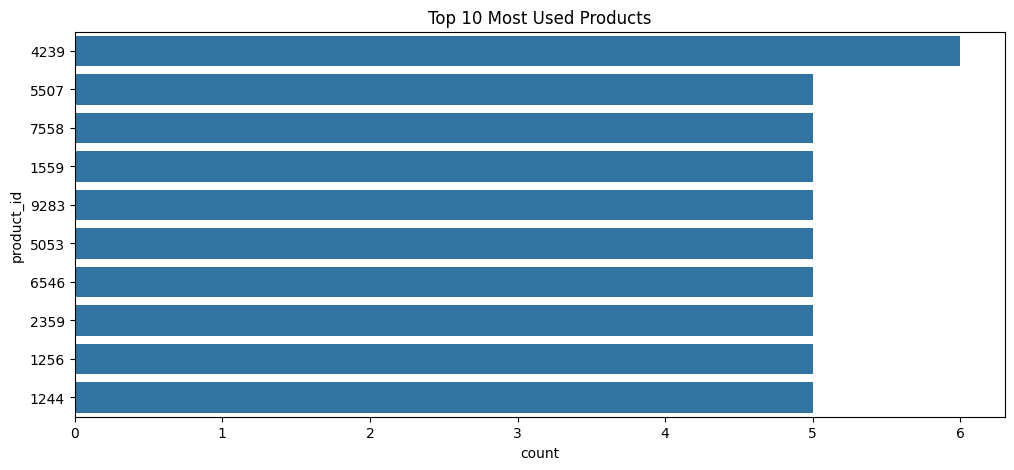

In [17]:

plt.figure(figsize=(12,5))
sns.countplot(y=df_cleaned['product_id'], order=df_cleaned['product_id'].value_counts().index[:10])
plt.title("Top 10 Most Used Products")
plt.show()


## 16. Bivariate Analysis: Product ID vs Consumption

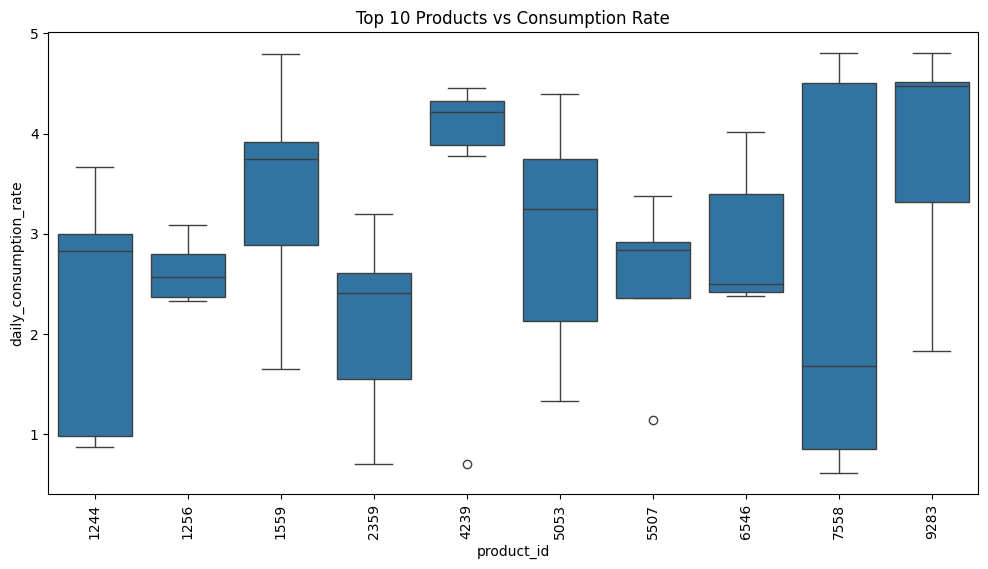

In [18]:

plt.figure(figsize=(12,6))
sns.boxplot(x='product_id', y='daily_consumption_rate', data=df_cleaned[df_cleaned['product_id'].isin(df_cleaned['product_id'].value_counts().index[:10])])
plt.xticks(rotation=90)
plt.title("Top 10 Products vs Consumption Rate")
plt.show()
